In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **Стохастический градиентный и координатный спуски**

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

# **Загрузка и подготовка данных**

✔Загрузите уже знакомый вам файл Advertising.csv как объект DataFrame.

In [ ]:
data = pd.read_csv('/content/Advertising.csv')

✔Проверьте, есть ли в данных пропуски и, если они есть - удалите их

In [ ]:
print(data.isna().sum())

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


Вывод по разделу:
Пропуски не обнаружены

✔Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)

In [ ]:
# Создание матрицы наблюдений X
X = data.drop(['sales', 'Unnamed: 0'], axis=1).values

# Вектор правильных ответов —  y
y = data['sales'].values

# check
X[:3], y[:3]

(array([[230.1,  37.8,  69.2],
        [ 44.5,  39.3,  45.1],
        [ 17.2,  45.9,  69.3]]),
 array([22.1, 10.4,  9.3]))

# **Координатный спуск (3 балла)**

✔Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:

In [ ]:
# import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

# check
X[:3]

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3]])

✔Нормализуем данные: обычно это необходимо для корректной работы алгоритма

In [ ]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

# check
X[:3]
# Normalization is done by dividing each element in a column
# by the square root of the sum of squares of all elements in that column.

array([[0.07071068, 0.09561706, 0.09692057, 0.13052034],
       [0.07071068, 0.01849178, 0.10076663, 0.08506456],
       [0.07071068, 0.00714739, 0.11768927, 0.13070895]])

✔Реализуйте алгоритм координатного спуска: (3 балла)

✔Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [ ]:
y = y.reshape(-1, 1)

num_iters = 1000
# извлекаем размеры матрицы X
m, n = X.shape
w = np.zeros((n,1))  # Нулевой вектор весов
r = y - X.dot(w)          # Инициализация остатков

# Координатный спуск
for iteration in range(num_iters):
    for j in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:j] @ w[0:j]) + (X[:,j+1:] @ w[j+1:])
        # Обновляем остатки, удаляя вклад текущего веса w_j
        r = y - h
        # Обновляем новое значение k-ого коэффициента
        w[j] = (X[:,j].T @ (y - h))
        # Вычисляем функцию потерь
        cost = (sum((X @ w) - y) ** 2)/(len(y))

# Выводим вектор весов
print(w)

[[ 41.56217205]
 [110.13144155]
 [ 73.52860638]
 [ -0.55006384]]


✔Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


In [ ]:
# Евклидово расстояние между векторами предсказаний координатным спуском и линейной регрессией sklearn
np.linalg.norm(w - model.coef_)

230.5421897033357

Если вы все сделали верно, они должны практически совпасть!

# **Стохастический градиентный спуск (6 баллов)**


✔Отмасштабируйте столбцы исходной матрицы X (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение (0.5 баллов)

In [ ]:
# Вернём изначальную (ненормализованную матрицу)
X = np.array(data[['TV','radio','newspaper']])
y = np.array(data['sales'])

X = (X - X.mean(axis=0)) / X.std(axis=0)

print('Среднее масштабированного массива: %.0f'%(abs(X.mean())))
print('Стандартные отклонения масштабированного массива: %.0f'%(X.std()))

Среднее масштабированного массива: 0
Стандартные отклонения масштабированного массива: 1


✔Добавим единичный столбец

In [ ]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

✔Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse (0.5 балла)

In [ ]:
def mse_error(y, y_pred):
    """Функция вычисления среднеквадратичной ошибки

    Args:
        y (float): реальное значение
        y_pred (float): предсказанное значение
    Returns:
        result (float): значение MSE
    """
    mse = ((y - y_pred) ** 2).mean()
    return mse # Вычисляем среднее значение реальных продаж


mean_sales = np.mean(y)

✔Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза (0.5 балла)

In [ ]:
y_pred = np.full_like(y, mean_sales)
# посчитаем MSE
mse = mse_error(y, y_pred)

print("Наивный прогноз (среднее значение продаж):", y_pred[0])
print("Среднеквадратичная ошибка (MSE) для наивного прогноза:", mse)

Наивный прогноз (среднее значение продаж): 14.0225
Среднеквадратичная ошибка (MSE) для наивного прогноза: 27.085743750000002


✔Создайте функцию lin_pred, которая может по матрице предикторов X и вектору весов линейной модели w получить вектор прогнозов (0.5 балла)

In [ ]:
def lin_pred(X, w):
    """Функция получит предсказания по весам линейной модели

    Args:
        X (array): матрица предикторов
        w (array): вектор весов линейной модели

    Returns:
        array: вектор прогнозов
    """
    y_pred = X@w
    return y_pred

In [ ]:
# Мы произвели стандартизацию вектора Х, поэтому нам нужно обновить вектор весов w
# Обновим веса w для отмасштабированных данных
def lin_reg(X, y):
    a = np.dot(X.T, X)
    b = np.dot(X.T, y)
    return np.linalg.solve(a, b)


w = lin_reg(X, y).T

y_pred = lin_pred(X, w)
print(f'MSE: {mse_error(y, y_pred)}')

MSE: 2.784126314510936


✔Создайте функцию stoch_grad_step для реализации шага стохастического градиентного спуска. (1.5 балла) Функция должна принимать на вход следующие аргументы:

матрицу X
вектора y и w
число train_ind - индекс объекта обучающей выборки (строки матрицы X), по которому считается изменение весов
число  𝜂  (eta) - шаг градиентного спуска
Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

Для того, чтобы написать функцию, нужно сделать следующее:

посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [ ]:
def stoch_grad_step(X, y, w, index, eta=0.01):
    """summary

    Args:
        X (array): матрица предикторов
        y (array): вектор ответов
        w (array): вектор весов
        train_ind (int): индекс объекта
        eta (float): шаг градиентного спуска
    Returns:
        array: обновленный вектор весов
    """
    x_sample = X[index]
    y_sample = y[index]

    y_pred = x_sample @ w

    gradient = x_sample * (y_pred-y_sample) / len(X)
    weights = w - 2 * eta * gradient

    return weights

In [ ]:
# Опять же желательно проверять работоспособность функций
stoch_grad_step(X, y, w, 11, 0.1)

array([14.02261487,  3.91934441,  2.79206845, -0.02267902])

✔Создайте функцию stochastic_gradient_descent, для реализации стохастического градиентного спуска (2.5 балла)

Функция принимает на вход следующие аргументы:

Матрицу признаков X
Целевую переменнную
Изначальную точку (веса модели)
Параметр, определяющий темп обучения
Максимальное число итераций
Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу
На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов  𝑤 , а также вектор (список) ошибок.

Алгоритм сследующий:

*   Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
*   Создайте пустой список для фиксации ошибок
*   Создайте счетчик итераций
*   Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
*   Верните вектор весов и вектор ошибок


In [ ]:
def stochastic_gradient_descent(X, y, w, eta=0.1, max_iter=1e+4, dist_min=1e-8):
    """Функция реализующая стохастический градиентный спуск

    Args:
        X (array): матрица предикторов
        y (array): вектор ответов
        w (array): вектор весов
        eta (float): шаг градиентного спуска
        max_iter (type): максимальное количество итерации
        dist_min (type): минимальное расстояние между векторами весов
    """

    distance = 1e+10 #расстояние между векторами
    errors = [] #список для фиксации ошибок
    iters = 0

    w_value = []

    while distance > dist_min and iters < max_iter:
        random_ind = np.random.randint(X.shape[0])
        y_pred = lin_pred(X, w)

        errors.append(mse_error(y, y_pred))
        w_new = stoch_grad_step(X, y, w, random_ind, eta)

        distance = np.linalg.norm(w - w_new)
        w_value.append(w)

        w = w_new
        iters += 1

    return w, w_value, errors

✔Запустите  105  итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.

✔Постройте график зависимости ошибки от номера итерации

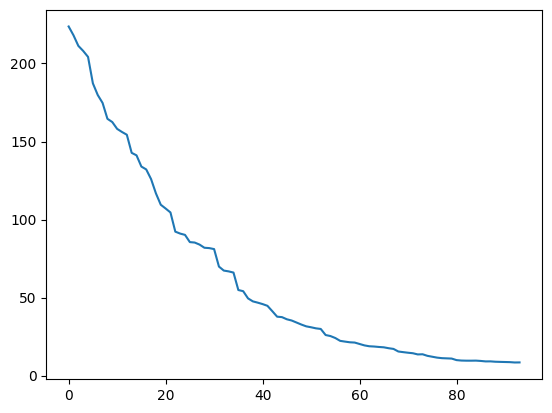

In [ ]:
w, w_values, errors = stochastic_gradient_descent(X, y, np.zeros(X.shape[1]), 2, 1e+5, dist_min=1e-3)
plt.plot(errors)


Выведите вектор весов, к которому сошелся метод.

In [ ]:
print(f'Вектор весов, к которому сошелся метод: {w}')

Вектор весов, к которому сошелся метод: [11.8175842   3.23549403  2.16586204  0.27896789]


Выведите среднеквадратичную ошибку на последней итерации.

In [ ]:
mse_error(X@w, y)

8.486206697768452

In [ ]:
# Для поиска итерации на которой достигнут минимум целевой метрики используем Pandas
model_data = pd.DataFrame({'MSE': errors, 'w_value': w_values})
w_optimal = model_data.iloc[model_data['MSE'].idxmin()][1]

print(f'Минимальная целевая метрика достигнута на \
      {model_data["MSE"].idxmin()} итерации, и составила \
      {errors[model_data["MSE"].idxmin()]} \
      \nВеса линейной регрессии при этом составили {w_optimal}')

Минимальная целевая метрика достигнута на       92 итерации, и составила       8.446130083664393       
Веса линейной регрессии при этом составили [11.82728595  3.24411377  2.15348683  0.28740259]


БОНУСНОЕ ЗАДАНИЕ
Разумеется, в реальности специалисты по машинному обучению не прописывают алгоритмы с нуля, а пользуются готовыми реализациями из библиотек. Реализованный Вами стохастический градиентный спуск представлен в библиотеке sklearn.

Что необходимо сделать:

Выберите в документации класс, подходящий для вашей задачи, и обучите стохастический градиентный спуск. Оцените качество с помощью среднеквадратичной ошибки и сравните результат с результатом алгоритма, реализованного вами самостоятельно. В одном из предыдущих модулей качество решения задачи регрессии оценивалось с помощью ещё одной метрики. Найдите её реализацию в библиотеке sklearn и оцените качество полученной модели. Данное задание не является обязательным, но, выполнив его, вы получите возможность заработать дополнительные 3 балла.

In [ ]:
X = df.drop(['sales', 'Unnamed: 0'], axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Define the hyperparameters to tune via Optuna
    max_iter = trial.suggest_int('max_iter', 100, 10000)
    tol = trial.suggest_float('tol', 1e-5, 1e-1, log=True)  # Updated method here
    l1_ratio = trial.suggest_float('l1_ratio', 0.1, 0.9)  # Assuming this was updated earlier

    # Create an instance of the SGDRegressor with the current hyperparameters
    sgd_reg = SGDRegressor(
        penalty='elasticnet',
        max_iter=max_iter,
        tol=tol,
        l1_ratio=l1_ratio,
        random_state=42,
    )

    # Fit the SGDRegressor to the scaled training data
    sgd_reg.fit(X_train_scaled, y_train)

    # Make predictions on the scaled testing data
    y_pred = sgd_reg.predict(X_test_scaled)

    # Calculate MSE on test data
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Create a study object and specify the direction is 'minimize'.
study = optuna.create_study(direction='minimize')

# Optimize the study, the objective function is passed in as the first argument.
study.optimize(objective, n_trials=50)  # You can specify the number of trials

# Extract the best estimator
best_params = study.best_params
best_sgd_reg = SGDRegressor(
    penalty='elasticnet',
    max_iter=best_params['max_iter'],
    tol=best_params['tol'],
    l1_ratio=best_params['l1_ratio'],
    random_state=42,
)
best_sgd_reg.fit(X_train_scaled, y_train)

# Make predictions with the best parameters
y_pred = best_sgd_reg.predict(X_test_scaled)

# Calculate MSE and MAE on test data
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE on test data: {mse}")
print(f"MAE on test data: {mae}")

# Print best hyperparameters
print("Best hyperparameters:", best_params)

[I 2023-12-24 13:03:18,564] A new study created in memory with name: no-name-f1550acb-0210-422c-ba72-804ea07b18c6
[I 2023-12-24 13:03:18,577] Trial 0 finished with value: 3.1723071991423746 and parameters: {'max_iter': 3274, 'tol': 0.000134229753032232, 'l1_ratio': 0.8897047055919644}. Best is trial 0 with value: 3.1723071991423746.
[I 2023-12-24 13:03:18,591] Trial 1 finished with value: 3.1975628404933523 and parameters: {'max_iter': 6275, 'tol': 0.0038904498399382078, 'l1_ratio': 0.7966146092003898}. Best is trial 0 with value: 3.1723071991423746.
[I 2023-12-24 13:03:18,604] Trial 2 finished with value: 3.172389492844331 and parameters: {'max_iter': 7776, 'tol': 2.9066871485126298e-05, 'l1_ratio': 0.6249284422975172}. Best is trial 0 with value: 3.1723071991423746.
[I 2023-12-24 13:03:18,617] Trial 3 finished with value: 3.172493333741611 and parameters: {'max_iter': 5186, 'tol': 3.161551914870035e-05, 'l1_ratio': 0.2909011836070793}. Best is trial 0 with value: 3.1723071991423746.


MSE on test data: 3.1709586603985103
MAE on test data: 1.4621717291267413
Best hyperparameters: {'max_iter': 3081, 'tol': 0.0003762320537916458, 'l1_ratio': 0.8529298846227388}
